In [1]:
"Hello"

'Hello'

First we import necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Importing and exploring our Dataset

In [3]:
housing_df=pd.read_csv('housing.csv')

In [6]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Ploting histogram to see distribution in our dataset

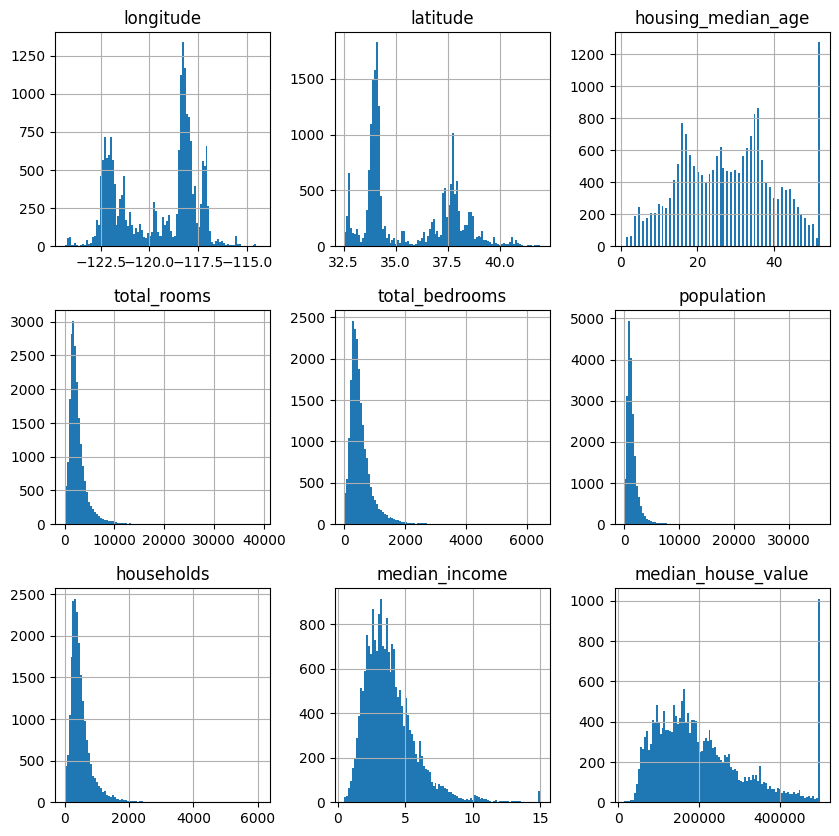

In [65]:
housing_df.hist(bins=100,figsize=(10,10))
plt.show()

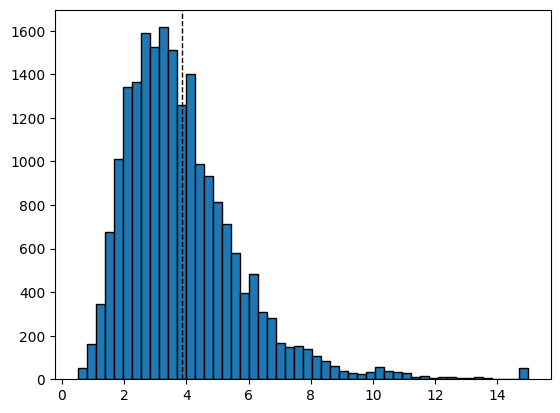

In [118]:
plt.hist(housing_df['median_income'],bins=50,edgecolor='black')
plt.axvline(housing_df['median_income'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

Creating a category bins for 'median_income' column.

In [119]:
housing_df["income_cat"]=pd.cut(housing_df['median_income'],bins=[0,1.5,3.0,4.5,6,np.inf],
                                labels=[1,2,3,4,5])

In [120]:
housing_df['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

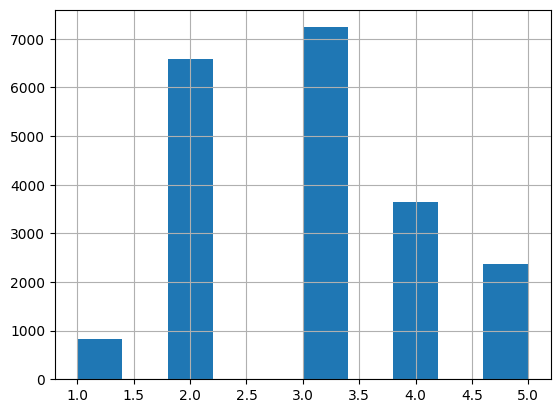

In [121]:
housing_df['income_cat'].hist()
plt.show()

Now splitting our data into tarining set and test set based on newly added 'income_cat' column. So both sets will have similar context of data.

In [122]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for i_train,i_test in split.split(housing_df,housing_df['income_cat']):
    train_set=housing_df.loc[i_train]
    test_set=housing_df.loc[i_test]

In [123]:
train_set['income_cat'].value_counts()/len(train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [124]:
test_set['income_cat'].value_counts()/len(test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

As shown above both "test_set['income_cat'].value_counts()/len(test_set)" and "train_set['income_cat'].value_counts()/len(train_set)" somewhat similar results, This means our data is divided equilly based on 'income_cat' categorical column.

Now that columns 'income_cat' has served its purpose. we will drop is from our training and test sets, as we do not want is to affect our predictions.

In [125]:
for i in (train_set,test_set):
    i.drop('income_cat',axis=1,inplace=True)

Now we will copy 'train_set' data seet into another dataset, so when we modify its data it will not affect the 'train_set' data set and it will serve as backup.

In [126]:
train_copy=train_set.copy()

Now we will do some plottings and see if we can catch any patterns in our dataset.

<Axes: xlabel='longitude', ylabel='latitude'>

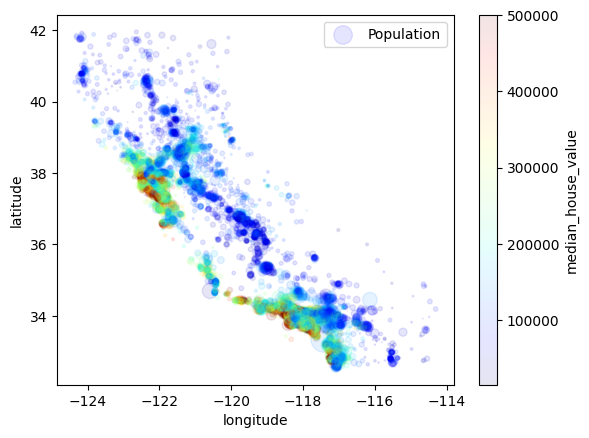

In [127]:
train_copy.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,
                s=train_copy['population']/100,label="Population",
                    c='median_house_value',cmap=plt.get_cmap('jet')
                )

The above plot shows how houses in california are spread over the state, and which region has large and small population along with its median house value, which it shows with the help of color-bar. 
The above plot shows us:- 
1)As we move north the median house value decreases. 
2)South and Mid coastal regions have bigger median house value compare to other regions.
3)In north population is less concebtrated.

Now we got an idea which features might influence median house value, but to be more certain now we will see the corelation between median house values and other attributes.

In [128]:
corl=train_copy.corr()
corl.iloc[:,8].sort_values(ascending=False).to_frame()

C:\Users\OMKAR\AppData\Local\Temp\ipykernel_13668\3613747884.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corl=train_copy.corr()


,median_house_value
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


The corelation near to 1 or -1 shows best positive and neagtive corelation respectively.

Now we will plot first four attribute column's histogram to visually reprsent the corealtions using sacatter_matrix from pandas

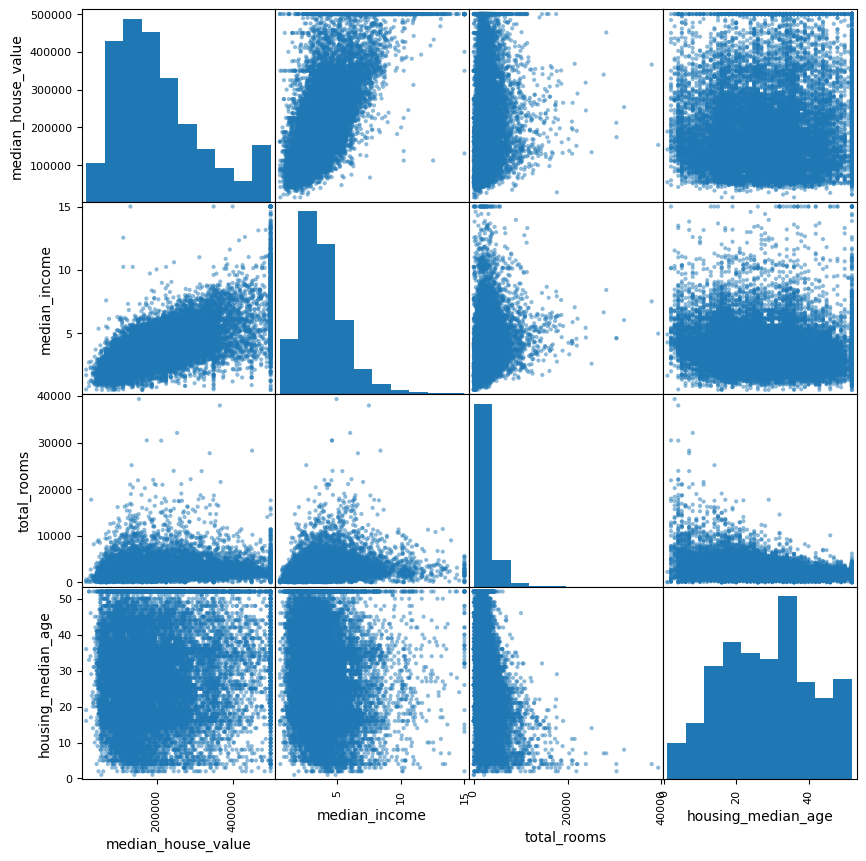

In [129]:
from pandas.plotting import scatter_matrix as sm
atrributes=['median_house_value','median_income','total_rooms','housing_median_age']
sm(train_copy[atrributes],figsize=(10,10))
plt.show()

Now looking at plots of median house value it looks like data authors have capped the median house value at 50,000,0.

The realtionship between median_income and median_houe_value looks linear, if we ignore the capped value on y-axis. Let's zoom it

<Axes: xlabel='median_income', ylabel='median_house_value'>

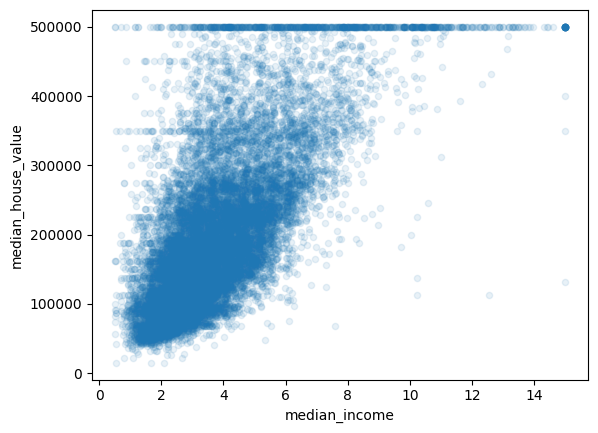

In [130]:
train_copy.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

We will add some additional attributes to our dataset like "rooms_per_household" etc. later down in the code to see corelations between them and median house value.

Now we will sepearte our train data by feutures and a label i.e our Y-axis values.

In [225]:
x_train=train_set.drop('median_house_value',axis=1)
y_train=train_set['median_house_value'].copy()

In [226]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [227]:
y_train.head()

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

In [228]:
x_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In above chart we can see columns 'total_bedrooms' is missing some data. We will use sklearn's simpleImputer function to fix that later in the code.

Now we will seperate numerical and categorical(ocean_proximity) data from x_train.

In [229]:
xnum_train=x_train.drop('ocean_proximity',axis=1)
xcat_train=x_train['ocean_proximity'].copy()

In [230]:
xnum_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


Now we will write a function to add those additional attributes which we talked about earlier(which are:- rooms_per_household,population_per_household,bedroom_per_household), the function will also inherit BaseEstimator and TransformMixin function's properties from sklearn.

In [231]:
from sklearn.base import BaseEstimator, TransformerMixin
room_ix,bedroom_ix,population_ix,house_ix=3,4,5,6
class attribsAdder(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,x,y=None):
        return self
    def transform(self,x,y=None):
        rooms_per_household=x[:,room_ix]/x[:,house_ix]
        population_per_household=x[:,population_ix]/x[:,house_ix]
        bedroom_per_rooms=x[:,bedroom_ix]/x[:,room_ix]
        return np.c_[x,rooms_per_household,population_per_household,bedroom_per_rooms]

Testing if our function is working or not

In [232]:
test_fn=attribsAdder()
test_fnmt=test_fn.transform(xnum_train.values)

In [233]:
tf=pd.DataFrame(test_fnmt)
tf.head(4)

,0,1,2,3,4,5,6,7,8,9,10
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,5.485836,3.168555,0.205784
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,6.927083,2.623698,0.160714
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,5.393333,2.223333,0.191595
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,3.886128,1.859213,0.276505


It is working as it added all the additional columns.

now we will import pipeline from sklearn along with some feuture scaling libraries to normalise,encode our data and to replace mising values with median value.Then we will create pipelines to apply it to our dataset.

In [234]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


Now we will create a pipeline to normalise our numerical data by using StandardScaler, It will also replace missing values and add additional attributes.

In [235]:
num_pipe=Pipeline([('imputer',SimpleImputer(strategy="median")),
                   ('StandardScaler',StandardScaler()),
                   ('Attrb_Addeer',attribsAdder())
                   ])

Now we will import ColumnTransformer from sklearn to transform our numeric and categorical columns.

In [236]:
from sklearn.compose import ColumnTransformer
xnum_train_attribs=list(xnum_train)
xcat_attribs=['ocean_proximity']
full_pipe=ColumnTransformer([
    ("num",num_pipe,xnum_train_attribs),
    ("cat",OneHotEncoder(),xcat_attribs)
    ])

In [237]:
x_train_prepared=full_pipe.fit_transform(x_train)

In [238]:
pd.DataFrame(x_train_prepared).head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,1.051217,1.316953,1.095068,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,1.748836,0.739773,0.619566,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,0.895817,1.286548,1.160430,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,9.348048,12.537756,0.104308,0.0,0.0,0.0,0.0,1.0


Now as our data is prepared for ML models, we can start implemeting several ML models. 

But first we will write several functions which will help us evaluate our models.

Following functions will cross validate model on our training data with random samplings and provide mean squared errors.

In [239]:
from sklearn.model_selection import cross_val_score
def crossVal(model,x_data,y_data,cv):
    scores=cross_val_score(model,x_data,y_data,scoring='neg_mean_squared_error',cv=cv)
    return np.sqrt(-scores)

Following function will display average of mean squred error and standard deviation along with list of all root mean squared errors.

In [240]:
def display_score(scores):
    print("Score: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ",scores.std())

In [241]:
from sklearn.metrics import mean_squared_error, r2_score
def showr2_msr(x,y):
    print("Root Mean Squared Error= ",np.sqrt(mean_squared_error(x,y)))
    print("R Squared= ",r2_score(x,y))

Now we can start training our data.
We will start with simple linear regression

In [248]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train_prepared,y_train)

LinearRegression()

In [249]:
lin_reg_pred=lin_reg.predict(x_train_prepared)
showr2_msr(y_train,lin_reg_pred)

Root Mean Squared Error=  69045.87683737626
R Squared=  0.6438562359607305


Here Root Mean Squared is 69045, so now we will fcross validate our model on random sample data from our training set using crosVal() function we created. And then we will display average root mean squared value using display_score() function. 
We will do this for every model.

In [250]:
display_score(crossVal(lin_reg,x_train_prepared,y_train,10))

Score:  [72219.07768166 65326.41399994 67705.62851038 69382.7984569
 66771.60368013 73008.66778031 70527.21385537 69436.74872708
 66926.59452443 70762.69184701]
Mean:  69206.74390632022
Standard Deviation:  2371.003773925006


We will saave mean of root mean squared values generated by crossVal() function in following dictionary. We will update the dictionary after implementing every model. 

In [265]:
ModelScored={"LinearRegression":69206}

Now we will do DecisionTreeRegressor

In [251]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(x_train_prepared,y_train)
tree_pred=tree_reg.predict(x_train_prepared)
showr2_msr(y_train,tree_pred)

Root Mean Squared Error=  0.0
R Squared=  1.0


It looks like DecisionTreeRegressor is over fitting, So we will check the results of cross validation.

In [252]:
display_score(crossVal(tree_reg,x_train_prepared,y_train,10))

Score:  [71564.22429675 70022.7967301  69237.06755142 72300.48070155
 71843.79171702 69889.108733   70560.07537201 71913.85325546
 68533.11656552 74883.33459324]
Mean:  71074.78495160844
Standard Deviation:  1736.5786775503695


After observing above result it looks like DecisionTreeRegressor did worse than LinearRegression

In [266]:
ModelScored.update({'DecisionTreeRegressor':71074})

now we will try RandomForestRegressor

In [255]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(x_train_prepared,y_train)
forest_pred=forest_reg.predict(x_train_prepared)
showr2_msr(y_train,forest_pred)

Root Mean Squared Error=  18392.075742095585
R Squared=  0.9747296452041239


In [256]:
display_score(crossVal(forest_reg,x_train_prepared,y_train,10))

Score:  [50954.29872722 49191.84708421 45842.953263   51092.12581314
 47748.41138426 49618.33268431 51547.80352375 48859.105539
 48522.9923108  53219.67182763]
Mean:  49659.75421573072
Standard Deviation:  2008.491901141751


In [267]:
ModelScored.update({"RandomForestRegressor":49659})

Now KNN REgressor

In [258]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor()
knn_reg.fit(x_train_prepared,y_train)
knn_pred=knn_reg.predict(x_train_prepared)
showr2_msr(y_train,knn_pred)

Root Mean Squared Error=  54640.36974880965
R Squared=  0.7769629023817601


In [260]:
display_score(crossVal(knn_reg,x_train_prepared,y_train,10))

Score:  [71114.0353164  66895.37110442 62443.53358442 68878.72436434
 64405.37368696 67986.77324557 71480.15868644 67752.42664892
 67177.91726209 69750.57602836]
Mean:  67788.48899279052
Standard Deviation:  2663.6661616344363


In [268]:
ModelScored.update({'KNeighborsRegressor':67788})

Now we will list the models by best scores(mimum root mean squared value)

In [270]:
sorted(ModelScored,key=ModelScored.get)

['RandomForestRegressor',
 'KNeighborsRegressor',
 'LinearRegression',
 'DecisionTreeRegressor']

As we can see RandomForestRegressor did best, So now we can work on tuning the RandomForestRegressor Model to get the best result.

Now we will import GridSearchCV from sklearn and then we will cross validate our models with several values at its parameters of 'n_estimators', 'max_features' and 'bootstrap'.

In [271]:
from sklearn.model_selection import GridSearchCV
par_grid=[{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
          {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
          ]

In [272]:
grid_search=GridSearchCV(forest_reg,par_grid,cv=5,
                         scoring='neg_mean_squared_error',
                         return_train_score=True)

In [273]:
grid_search.fit(x_train_prepared,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Now we can get best parameters to work with

In [274]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

As we can see {'max_features': 8, 'n_estimators': 30} scored best in all the cross validations.

We can get result of each cross validation with following code.

In [276]:
cvres=grid_search.cv_results_
for mean , params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean)," ",params)

66986.84123605123   {'max_features': 2, 'n_estimators': 3}
57710.3174251406   {'max_features': 2, 'n_estimators': 10}
54466.14898038692   {'max_features': 2, 'n_estimators': 30}
61482.436704841195   {'max_features': 4, 'n_estimators': 3}
53678.69430489051   {'max_features': 4, 'n_estimators': 10}
51673.91611733445   {'max_features': 4, 'n_estimators': 30}
61099.1012502639   {'max_features': 6, 'n_estimators': 3}
53000.56028235077   {'max_features': 6, 'n_estimators': 10}
50636.13493493158   {'max_features': 6, 'n_estimators': 30}
59538.19652774576   {'max_features': 8, 'n_estimators': 3}
52594.82353739762   {'max_features': 8, 'n_estimators': 10}
50260.55233430135   {'max_features': 8, 'n_estimators': 30}
63914.57708842064   {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
56563.6402727666   {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61914.947936852375   {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53885.755413678904   {'bootstrap': False, 'max_

We can see how much different feature affected the score

In [279]:
feutures_imp=grid_search.best_estimator_.feature_importances_
feutures_imp

array([1.02675419e-01, 8.93604072e-02, 4.31770823e-02, 2.55285513e-02,
       2.21426229e-02, 3.08882438e-02, 2.06691159e-02, 4.09143007e-01,
       2.18377342e-02, 3.47234301e-02, 2.11071884e-02, 1.27571690e-02,
       1.57753843e-01, 5.39275233e-05, 2.77969018e-03, 5.40256929e-03])

We must label our data to understand the result

In [280]:
new_attr=['rooms_per_household','population_per_household','bedrooms_per_room']
cat_encoder=full_pipe.named_transformers_['cat']
catlist=list(cat_encoder.categories_[0])
attrs=xnum_train_attribs+new_attr+catlist

In [282]:
sorted(zip(feutures_imp,attrs),reverse=True)

[(0.409143006508024, 'median_income'),
 (0.1577538427898189, 'INLAND'),
 (0.10267541873259266, 'longitude'),
 (0.08936040721116871, 'latitude'),
 (0.04317708226383976, 'housing_median_age'),
 (0.03472343007897642, 'population_per_household'),
 (0.03088824377327941, 'population'),
 (0.025528551319941032, 'total_rooms'),
 (0.022142622851954254, 'total_bedrooms'),
 (0.021837734217526734, 'rooms_per_household'),
 (0.02110718837642444, 'bedrooms_per_room'),
 (0.02066911593061078, 'households'),
 (0.012757168952621986, '<1H OCEAN'),
 (0.005402569294483072, 'NEAR OCEAN'),
 (0.002779690175455915, 'NEAR BAY'),
 (5.392752328186118e-05, 'ISLAND')]

Now storing best model in 'Final_model' variable to use it on test set

In [283]:
final_model=grid_search.best_estimator_

Now testing our model on test set

First transforming test set data to make is suitable for our mode.

In [284]:
x_test=test_set.drop('median_house_value',axis=1)
y_test=test_set['median_house_value'].copy()

In [285]:
x_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,NEAR OCEAN


In [286]:
y_test.head()

5241     500001.0
17352    162500.0
3505     204600.0
7777     159700.0
14155    184000.0
Name: median_house_value, dtype: float64

In [289]:
x_test_prepared=full_pipe.transform(x_test)
x_test_prepared

array([[ 0.59229422, -0.71065803,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [-0.42180959, -0.35049119, -0.37006852, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56232071, -0.64985064,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.07211862, -0.56097831,  1.14093342, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83208232, -0.93985512,  0.10708999, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.50736927, -0.67791559,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ]])

In [290]:
final_prediction=final_model.predict(x_test_prepared)

In [291]:
showr2_msr(y_test,final_prediction)

Root Mean Squared Error=  47912.792213225235
R Squared=  0.8238617961541236


Now our model is ready to be deployed. :)